# Análise de Associação

#### Exemplo 1.
Usar o algoritmo Apriori na base de dados com transações de um mercado para fazer análise de associação de produtos vendidos

In [29]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import apyori

plt.rcParams['figure.figsize'] = (30, 20)

In [30]:
#dataset
url = 'https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/market-basket-optimisation.csv'
df_mercado = pd.read_csv(url, header=None)
df_mercado.head(20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,whole wheat pasta,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,soup,light cream,shallot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,frozen vegetables,spaghetti,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,french fries,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#tamanho dataframe
len(df_mercado)

7501

In [32]:
#remover espaço das strings
for index in df_mercado.columns:
    df_mercado[index] = df_mercado[index].str.strip()

In [33]:
#encontrar valores unicos do df
itens = df_mercado.melt()['value'].dropna().sort_values()
print('número de produtos: {}\nProdutos distintos: \n{}'.format(itens.nunique(), itens.unique()))

número de produtos: 119
Produtos distintos: 
['almonds' 'antioxydant juice' 'asparagus' 'avocado' 'babies food' 'bacon'
 'barbecue sauce' 'black tea' 'blueberries' 'body spray' 'bramble'
 'brownies' 'bug spray' 'burger sauce' 'burgers' 'butter' 'cake'
 'candy bars' 'carrots' 'cauliflower' 'cereals' 'champagne' 'chicken'
 'chili' 'chocolate' 'chocolate bread' 'chutney' 'cider'
 'clothes accessories' 'cookies' 'cooking oil' 'corn' 'cottage cheese'
 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar' 'energy drink'
 'escalope' 'extra dark chocolate' 'flax seed' 'french fries'
 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green te

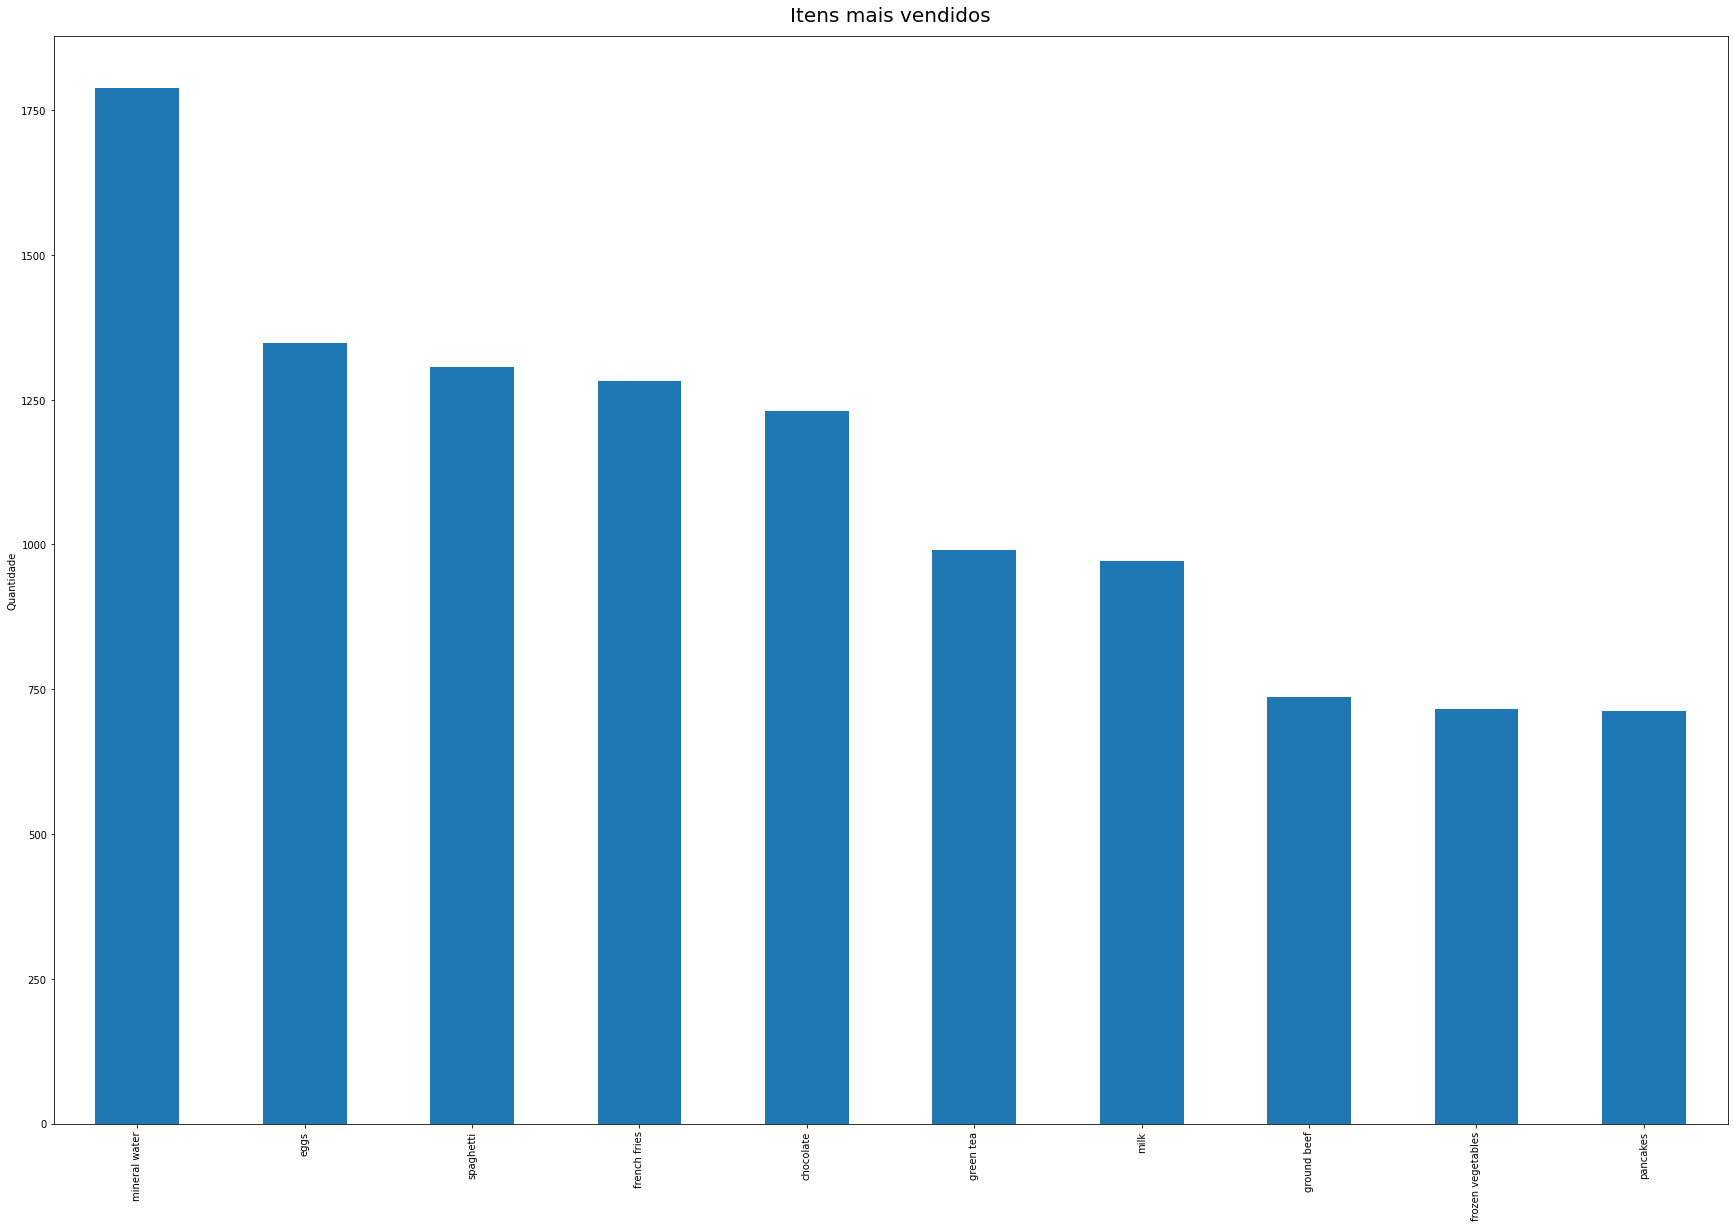

In [34]:
#encontrar itens mais vendidos
n_itens = itens.value_counts()

barra = n_itens.nlargest(10).plot(kind='bar')
barra.set_title('Itens mais vendidos', size=20, weight=500, pad=15)
barra.set_ylabel('Quantidade')
plt.show()

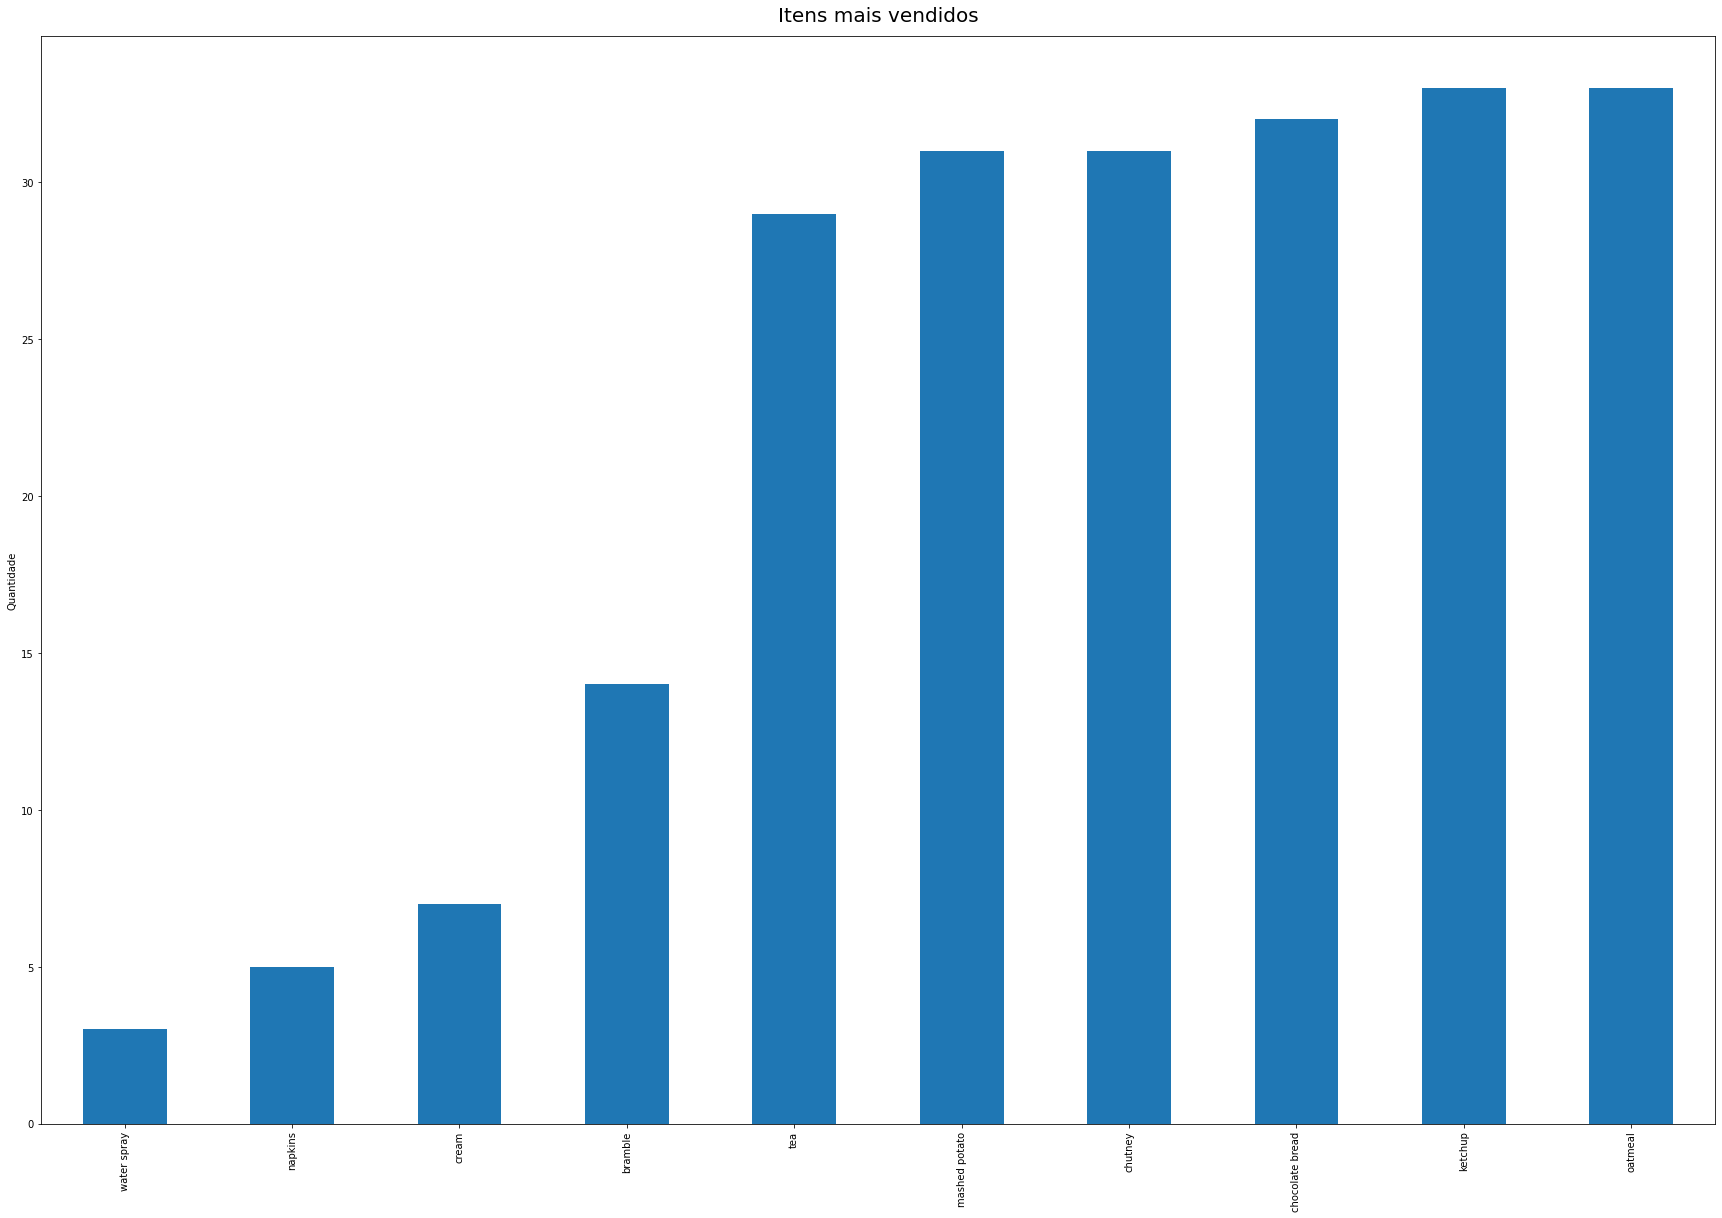

In [35]:
#encontrar itens menos vendidos
n_itens = itens.value_counts()

barra = n_itens.nsmallest(10).plot(kind='bar')
barra.set_title('Itens mais vendidos', size=20, weight=500, pad=15)
barra.set_ylabel('Quantidade')
plt.show()

In [36]:
#Separar objetos com mais de um item na transação para analisar associações
qte_por_venda = df_mercado.notna().apply(sum, axis=1)

vendas = [set(linha.dropna()) for _, linha in df_mercado[qte_por_venda > 1].iterrows()]
vendas[:5]

[{'almonds',
  'antioxydant juice',
  'avocado',
  'cottage cheese',
  'energy drink',
  'frozen smoothie',
  'green grapes',
  'green tea',
  'honey',
  'low fat yogurt',
  'mineral water',
  'olive oil',
  'salad',
  'salmon',
  'shrimp',
  'spinach',
  'tomato juice',
  'vegetables mix',
  'whole weat flour',
  'yams'},
 {'burgers', 'eggs', 'meatballs'},
 {'avocado', 'turkey'},
 {'energy bar', 'green tea', 'milk', 'mineral water', 'whole wheat rice'},
 {'french fries', 'whole wheat pasta'}]

In [37]:
len(vendas)

5747

In [38]:
#rodar algoritmo apriori para análise de associação
minsup = 0.04 #baixo por se tratar de um df com poucas associações
minconf = 0.3
regras_associacao = apyori.apriori(vendas, min_support=minsup, min_confidence=minconf)

for regra in regras_associacao:
    itens = list(regra.items)
    print( f"{itens[:-1]} --> [{itens[-1]}]  Suporte: {regra.support:.3f}"
           f"  Confiança: {regra.ordered_statistics[0].confidence:.3f}")

['mineral water'] --> [chocolate]  Suporte: 0.069  Confiança: 0.342
['mineral water'] --> [eggs]  Suporte: 0.066  Confiança: 0.304
['mineral water'] --> [frozen vegetables]  Suporte: 0.047  Confiança: 0.385
['mineral water'] --> [ground beef]  Suporte: 0.053  Confiança: 0.429
['spaghetti'] --> [ground beef]  Suporte: 0.051  Confiança: 0.411
['mineral water'] --> [milk]  Suporte: 0.063  Confiança: 0.383
['mineral water'] --> [pancakes]  Suporte: 0.044  Confiança: 0.375
['mineral water'] --> [spaghetti]  Suporte: 0.078  Confiança: 0.357


#### Exemplo 2.
Usar o algoritmo Alpriori para identificar regras de associação em uma base de dados de uma padaria
url: https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/cesta_padaria.csv

Gere a lista dos itens mais vendidos e menos vendidos. Em seguida use minsup = 0.04 e minconf = 0.4 para gerar regras de associação

In [40]:
df_padaria = pd.read_csv('https://raw.githubusercontent.com/higoramario/univesp-com360-mineracao-dados/main/cesta_padaria.csv')
df_padaria.head()

/home/felipe_oliveira/anaconda3/envs/env_01/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,5,8,9,10,12,16,18,20,27,31,33,34,36,38,39,41,42,44,46,52,53,54,56,59,63,64,66,67,68,69,70,71,76,80,81,82,84,89,90,92,93) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#encontrar valores unicos do df
itens = df_padaria.melt()['value'].dropna().sort_values()
print('número de produtos: {}\nProdutos distintos: \n{}'.format(itens.nunique(), itens.unique()))

número de produtos: 94
Produtos distintos: 
['adjustment' 'afternoon with the baker' 'alfajores' 'argentina night'
 'art tray' 'bacon' 'baguette' 'bakewell' 'bare popcorn' 'basket'
 'bowl nic pitt' 'bread' 'bread pudding' 'brioche and salami' 'brownie'
 'cake' 'caramel bites' 'cherry me dried fruit' 'chicken sand'
 'chicken stew' 'chimichurri oil' 'chocolates' 'christmas common' 'coffee'
 'coffee granules' 'coke' 'cookies' 'crepes' 'crisps'
 'drinking chocolate spoons' 'duck egg' 'dulce de leche' 'eggs'
 "ella's kitchen pouches" 'empanadas' 'extra salami or feta' 'fairy doors'
 'farm house' 'focaccia' 'frittata' 'fudge' 'gift voucher'
 'gingerbread syrup' 'granola' 'hack the stack' 'half slice monster'
 'hearty & seasonal' 'honey' 'hot chocolate' 'jam' 'jammie dodgers'
 'juice' 'keeping it local' 'kids biscuit' 'lemon and coconut' 'medialuna'
 'mighty protein' 'mineral water' 'mortimer' 'muesli' 'muffin'
 'my-5 fruit shoot' 'nomad bag' 'olum & polenta' 'panatone' 'pastry'
 'pick and mi

In [ ]:
#gerar lista com itens mais vendidos
n_itens = itens.value_counts()

barra = n_itens.nlargest(10).plot(kind='bar')
barra.set_title('Itens mais vendidos', size=20, weight=500, pad=15)
barra.set_ylabel('Quantidade')
plt.show()

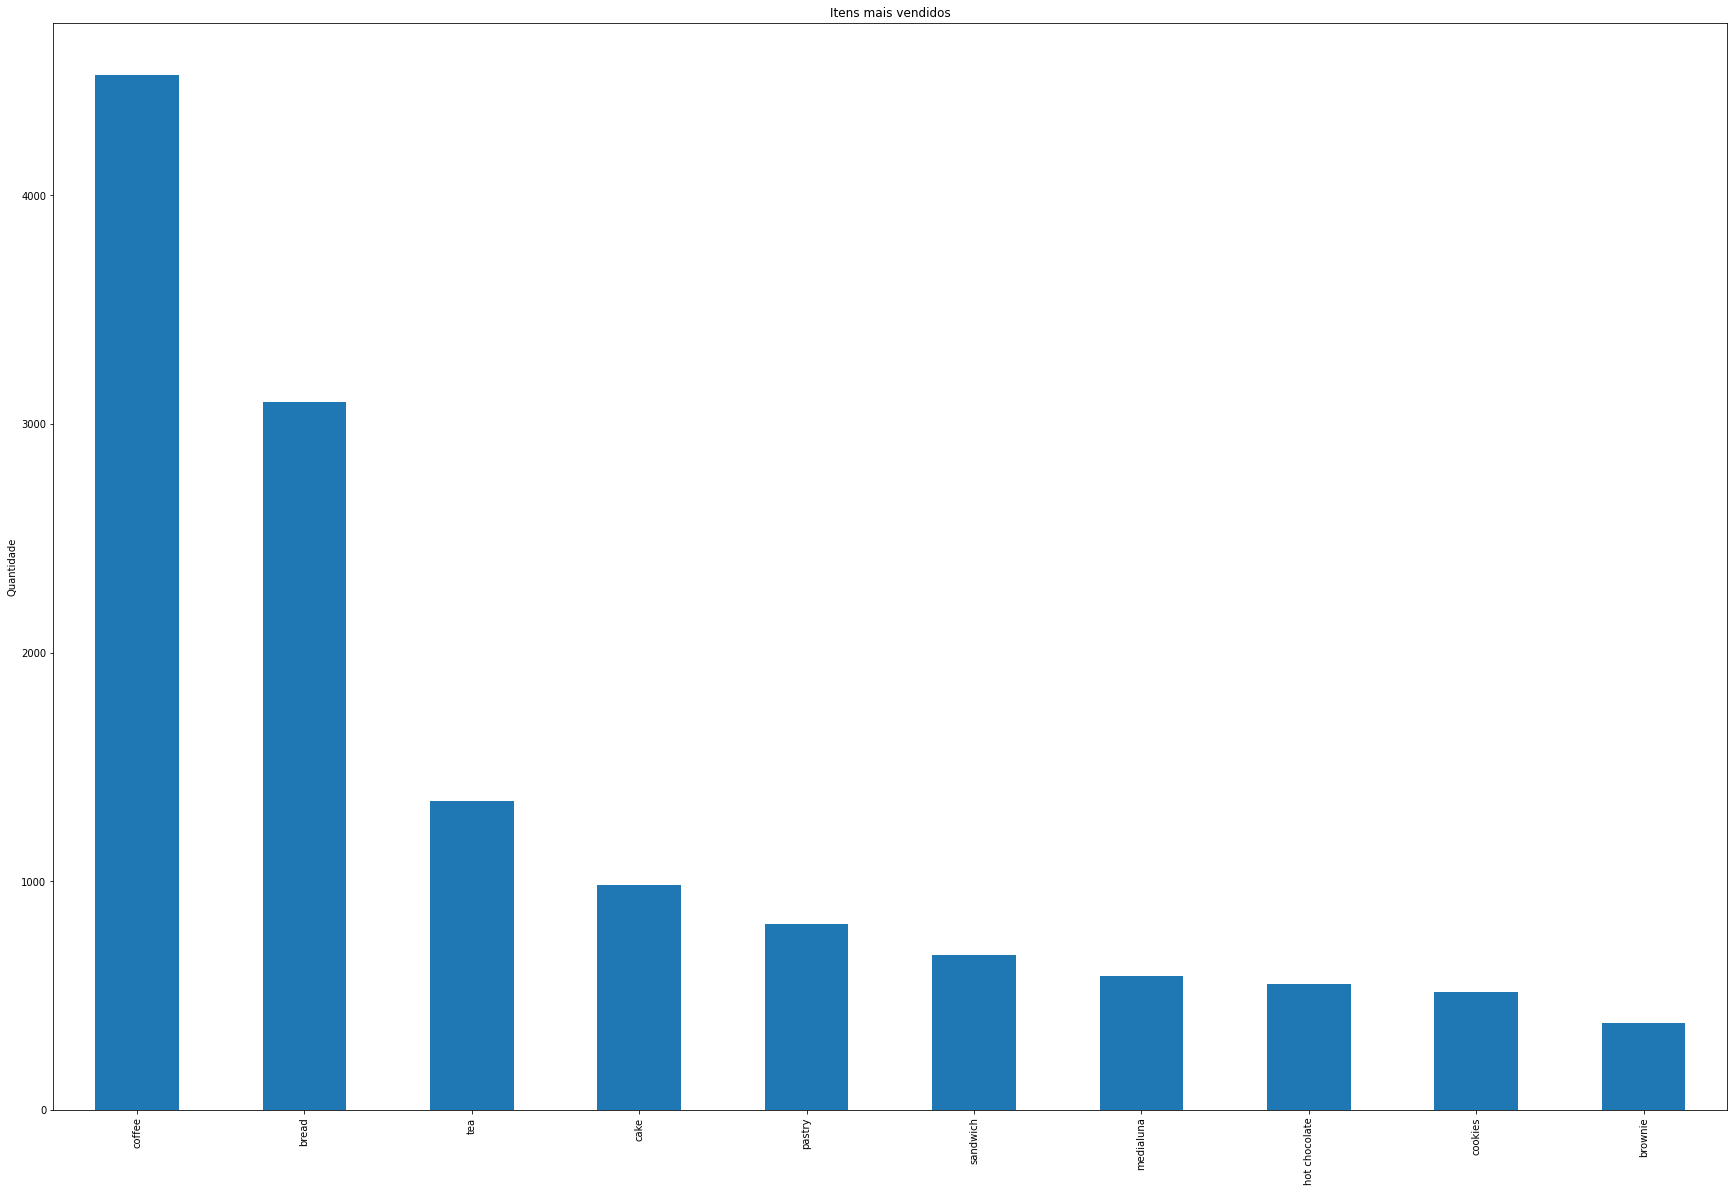

In [70]:
n_itens = itens.value_counts()

mais_vendidos = n_itens.nlargest(10).plot(kind='bar')
mais_vendidos.set_title('Itens mais vendidos')
mais_vendidos.set_ylabel('Quantidade')
plt.show()

In [71]:
n_itens.nlargest(10)

coffee           4528
bread            3097
tea              1350
cake              983
pastry            815
sandwich          680
medialuna         585
hot chocolate     552
cookies           515
brownie           379
Name: value, dtype: int64

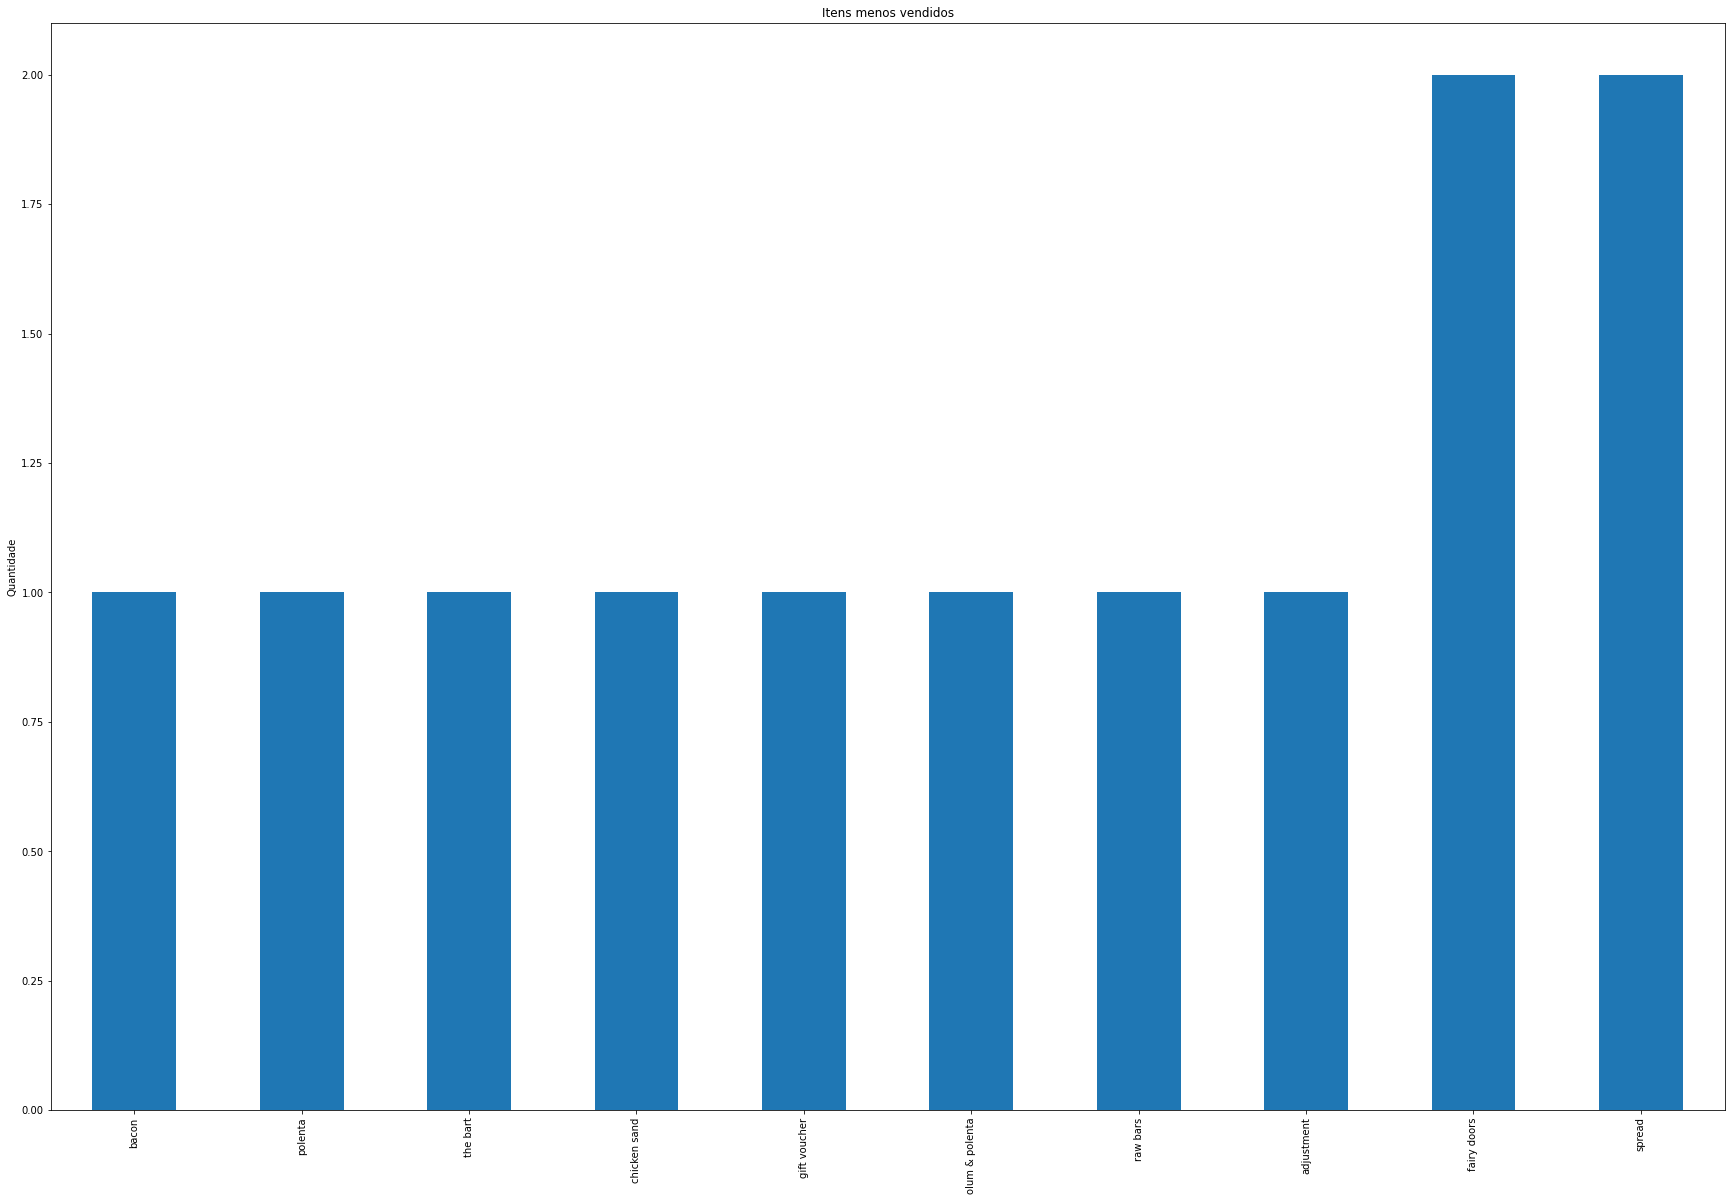

In [69]:
menos_vendidos = n_itens.nsmallest(10).plot(kind='bar')
menos_vendidos.set_title('Itens menos vendidos')
menos_vendidos.set_ylabel('Quantidade')
plt.show()

In [73]:
n_itens.nsmallest(10)

bacon             1
polenta           1
the bart          1
chicken sand      1
gift voucher      1
olum & polenta    1
raw bars          1
adjustment        1
fairy doors       2
spread            2
Name: value, dtype: int64

In [74]:
#Separar objetos com mais de um item na transação para gerar regras de associação
qtd_venda = df_padaria.notna().apply(sum, axis=1)

vendas = [set(linha.dropna()) for _, linha in df_padaria[qtd_venda > 1].iterrows()]
vendas

[{'cookies', 'hot chocolate', 'jam'},
 {'bread', 'coffee', 'pastry'},
 {'medialuna', 'muffin', 'pastry'},
 {'coffee', 'medialuna', 'pastry', 'tea'},
 {'bread', 'pastry'},
 {'bread', 'muffin'},
 {'medialuna', 'scandinavian'},
 {'bread', 'medialuna'},
 {'coffee', 'jam', 'pastry', 'tartine', 'tea'},
 {'basket', 'bread', 'coffee'},
 {'bread', 'medialuna', 'pastry'},
 {'mineral water', 'scandinavian'},
 {'bread', 'coffee', 'medialuna'},
 {'bread', 'farm house'},
 {'bread', 'medialuna'},
 {'bread', 'coffee', 'medialuna'},
 {'muffin', 'scandinavian'},
 {'bread', 'coffee'},
 {'bread', 'jam'},
 {'muffin', 'scandinavian'},
 {'coffee', 'muffin'},
 {'muffin', 'scandinavian'},
 {'bread', 'tea'},
 {'bread', 'coffee'},
 {'bread', 'tea'},
 {'coffee', 'juice', 'muffin', 'tartine'},
 {'bread', 'tea'},
 {'fudge', 'scandinavian'},
 {'coffee', 'medialuna'},
 {'coffee', 'hot chocolate', 'medialuna'},
 {'bread', "ella's kitchen pouches", 'jam', 'juice', 'muffin'},
 {'coffee', 'medialuna'},
 {'bread', 'victor

In [75]:
#apriori
minsup = 0.04
minconf = 0.4
regras_associacao = apyori.apriori(vendas, min_support=minsup, min_confidence=minconf)

for regra in regras_associacao:
    itens = list(regra.items)
    print( f"{itens[:-1]} --> [{itens[-1]}]  Suporte: {regra.support:.3f}"
           f"  Confiança: {regra.ordered_statistics[0].confidence:.3f}")

[] --> [coffee]  Suporte: 0.604  Confiança: 0.604
['bread'] --> [coffee]  Suporte: 0.154  Confiança: 0.447
['cake'] --> [coffee]  Suporte: 0.094  Confiança: 0.586
['cookies'] --> [coffee]  Suporte: 0.048  Confiança: 0.568
['hot chocolate'] --> [coffee]  Suporte: 0.051  Confiança: 0.580
['coffee'] --> [medialuna]  Suporte: 0.060  Confiança: 0.631
['pastry'] --> [coffee]  Suporte: 0.082  Confiança: 0.600
['coffee'] --> [sandwich]  Suporte: 0.066  Confiança: 0.591
['coffee'] --> [tea]  Suporte: 0.086  Confiança: 0.412
['toast'] --> [coffee]  Suporte: 0.041  Confiança: 0.737
